In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Set your username and token here!
username = 'xmansoura'
token = '77da82486bcd2f4b'

# Set the datastream and start/enddates
datastream = 'sgpaosmetE13.a1'
startdate = '2019-04-04'
enddate = '2019-04-05'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] sgpaosmetE13.a1.20190404.000000.nc

If you use these data to prepare a publication, please cite:

Kyrouac, J., Springston, S., & Tuftedal, M. Meteorological Measurements
associated with the Aerosol Observing System (AOSMET). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1984920



In [3]:
# Let's read in the data using ACT and check out the data
ds_mpl = act.io.read_arm_netcdf(result)

ds_mpl

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<xarray.Dataset> Size: 6MB
Dimensions:              (time: 86399)
Coordinates:
  * time                 (time) datetime64[ns] 691kB 2019-04-04T00:00:00.2200...
Data variables: (12/17)
    base_time            datetime64[ns] 8B 2019-04-04
    time_offset          (time) datetime64[ns] 691kB 2019-04-04T00:00:00.2200...
    rh_ambient           (time) float32 346kB dask.array<chunksize=(86399,), meta=np.ndarray>
    temperature_ambient  (time) float32 346kB dask.array<chunksize=(86399,), meta=np.ndarray>
    pressure_ambient     (time) float32 346kB dask.array<chunksize=(86399,), meta=np.ndarray>
    wind_speed           (time) float32 346kB dask.array<chunksize=(86399,), meta=np.ndarray>
    ...                   ...
    heater_volts         (time) float32 346kB dask.array<chunksize=(86399,), meta=np.ndarray>
    supply_volts         (time) float32 346kB dask.array<chunksize=(86399,), meta=np.ndarray>
    ref_volts            (time) float32 346kB dask.array<chunksize=(86399,), meta=np.ndarray>
    lat                  float32 4B ...
    lon                  float32 4B ...
    alt                  float32 4B ...
Attributes: (12/23)
    command_line:                aosmet_ingest -s sgp -f E13
    Conventions:                 ARM-1.2
    process_version:             ingest-aosmet-1.0-0.el6
    dod_version:                 aosmet-a1-2.2
    input_source:                /data/collection/sgp/sgpaosmetE13.00/sgpaosE...
    site_id:                     sgp
    ...                          ...
    doi:                         10.5439/1325987
    history:                     created by user dsmgr on machine ruby at 201...
    _file_dates:                 ['20190404']
    _file_times:                 ['000000']
    _datastream:                 sgpaosmetE13.a1
    _arm_standards_flag:         1

<Axes: title={'center': 'sgpaosmetE13.a1 rh_ambient on 20190404'}, xlabel='Time [UTC]', ylabel='(%)'>

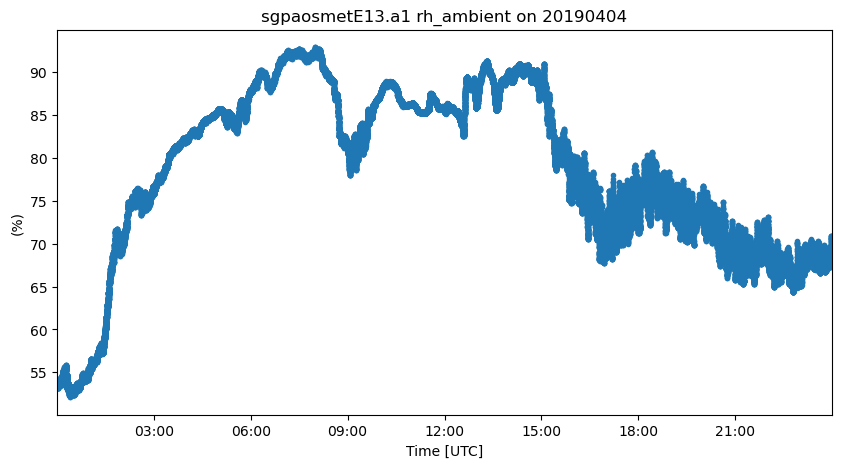

In [4]:
# Let's take a look at the quality control information associated with a variable from the MPL
variable = 'rh_ambient'

# First, for many of the ACT QC features, we need to get the dataset more to CF standard and that
# involves cleaning up some of the attributes and ways that ARM has historically handled QC
ds_mpl.clean.cleanup()

# Apply corrections for the ceilometer, correcting for the vertical height
#ds_mpl = act.corrections.ceil.correct_ceil(ds_mpl,-999.0)

# Next, let's take a look at visualizing the quality control information
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds_mpl, figsize=(10, 5), subplot_shape=(1,))

# # Plot up the variable in the first plot
display.plot(variable, subplot_index=(0,))

# # Plot up the QC variable in the second plot
# #display.qc_flag_block_plot(variable, subplot_index=(1,))
# plt.show()

In [ ]:
variable = ds_mpl['backscatter']
variable.plot()

In [ ]:
ds_mpl['backscatter'].compute()